In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger

In [4]:
from manifoldembedder import *

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [6]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/jet_pair_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/jet_pair_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/jet_pair_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

In [7]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_triplet_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_triplet_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_triplet_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

# 16 particles

In [8]:
file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_16p_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_16p_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/jet_16p_predict_temp.pt'}

In [9]:
#dataset = torch.load('/nobackup/users/sangeon/datasets/jets/concat_train_temp.pt')

In [10]:
#jetpair_train = DataLoader(dataset, batch_size=10000,shuffle=True,num_workers=4)

In [11]:
jet_dm = JetDataModule(file_dict,1000)
#jettriplet_dm = 

In [12]:
#emd = np.array([])
#for i,(_,_,dist) in enumerate(jetpair_train):
#    if i>100:
#        break
#    emd = np.concatenate([emd,dist.data.numpy()])

In [13]:
#emd

In [14]:
#plt.hist(emd)

In [15]:
#d_model, nhead, num_encoder_layers, num_decoder_layers, embed_dim, max_seq_length, pos_dropout, trans_dropout, layer_widths

In [16]:
#lr, npart, embed_dim, hidden_size, num_rnn_layers, layer_widths

In [17]:
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 2 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",3,"Transformer", 0.00054607179632484, 16, 4 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 16, 4 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 16, 4 , 2, 2, 2, 16, 0.7,0.7, [500,300,10])
model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 8 , 4, 4, 2, 16, 0.75,0.75, [500,300,10])

#model = ManifoldEmbedder("jets",3, "Transformer", 0.00054607179632484, 32, 8 , 4, 4, 2, 8, 0.5,0.5, [1000,500,10])
#model = ManifoldEmbedder("jets","MLP", 1e-2, 8, 2, [100,100,100,80,40,20,10])
#model = ManifoldEmbedder('jets',3,"GRU", 0.02089296130854041, 8, 2, 40, 40, [1000,500,10])


In [18]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder/f5b413b6a54744ad8e4ced063efaacd1



In [19]:
comet_logger = CometLogger(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

CometLogger will be initialized in online mode


In [20]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=20, verbose=False)

In [30]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/training/checkpoints",
    filename="Transformer-mapeloss-16p-normalizept-moreparams-checkpoint-{epoch:02d}-{val_loss:.2f}",
    save_top_k=4,
    mode="min",
)

In [31]:
trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Starting to init trainer!
Trainer is init now


In [32]:
#trainer.tune(model, jetpair_dm)

In [33]:
lr_finder = trainer.tuner.lr_find(model, jet_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/training/lr_find_temp_model_a0441355-ffae-4a76-810c-2aeb4f3919bc.ckpt


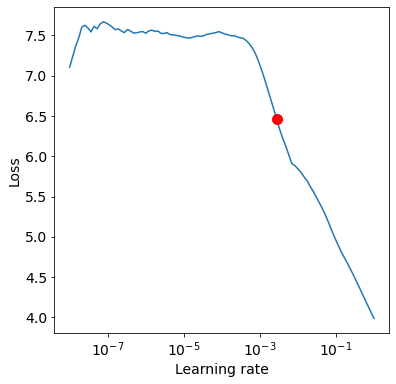

In [34]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [35]:
new_lr = lr_finder.suggestion()

In [36]:
new_lr

0.002754228703338169

In [37]:
model.hparams.learning_rate = new_lr

In [38]:
model.learning_rate = new_lr

In [39]:
model.learning_rate

0.002754228703338169

In [40]:
trainer.fit(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/f5b413b6a54744ad8e4ced063efaacd1
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [40] : (0.8156678676605225, 8.329398155212402)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (285.92 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model graph              : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when fini

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:685: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [33]:
predictloader = jet_dm.predict_dataloader()

AttributeError: 'JetDataModule' object has no attribute 'jetpair_predict'

In [ ]:
for temp in predictloader:
    print(temp[0][0])

In [41]:
a = trainer.predict(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET WARNING: Set model graph ignored; already called. Call with overwrite=True to replace graph definition
/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 1579it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:172: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/8dceca3522b14f2588509a4f169c4268
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [777]      : (0.3054999113082886, 6.851253032684326)
COMET INFO:     train_loss [77] : (0.3157311677932739, 1.3534636497497559)
COMET INFO:     val_loss        : 0.6044037938117981
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata 

In [42]:
label = np.array([])
embedding = np.empty((0,2))
for batch in a:
    #print(batch[0].shape)
    #print(batch[1].shape)
    embedding = np.vstack((embedding, batch[0].cpu().numpy()))
    label = np.concatenate([label, batch[1].cpu().numpy()])
    #print(batch[0], batch[1])

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [44]:
embedding[label==0]

array([[-0.23200394, -0.09061365],
       [-0.23096661, -0.09102557],
       [-0.23239538, -0.090474  ],
       ...,
       [-0.23303163, -0.09007649],
       [-0.22572349, -0.09289783],
       [-0.22829469, -0.09162569]])

In [45]:
embedding[label==1]

array([[-0.03022953, -0.11394282],
       [-0.03022907, -0.11394182],
       [-0.03022875, -0.11394158],
       ...,
       [-0.03022984, -0.11394307],
       [-0.03022788, -0.11393967],
       [-0.03022849, -0.113941  ]])

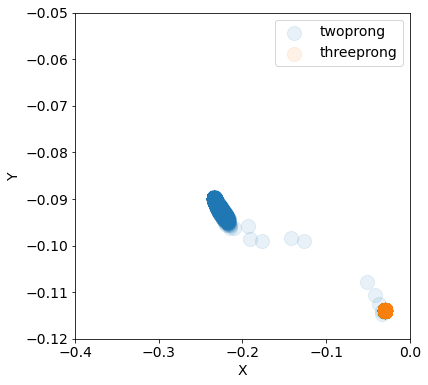

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(embedding[label==0][:10000,0],embedding[label==0][:10000,1],s=200,alpha=0.1,label='twoprong')
ax.scatter(embedding[label==1][:10000,0],embedding[label==1][:10000,1],s=200,alpha=0.1,label='threeprong')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.4,0])
ax.set_ylim([-0.12,-0.05])
ax.legend()
fig.savefig(f'../figures/jet_embedding_16PART_0.png')

(-100.0, 100.0)

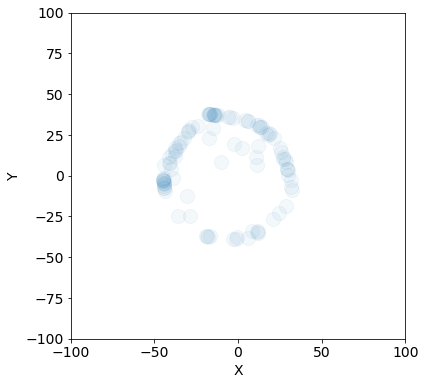

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(embedding[label==0][:1000,0],embedding[label==0][:1000,1],s=200,alpha=0.05)
ax.scatter(embedding[label==1][:100,0],embedding[label==1][:100,1],s=200,alpha=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
#fig.savefig(f'{path}/{name}.png')

In [42]:
embedding[label==0]

array([[34.16513062, -1.49830151],
       [34.1387825 , -1.53783011],
       [34.53158569, -0.93025315],
       ...,
       [34.1339798 , -1.54286742],
       [30.40222168,  5.07749081],
       [34.23294067, -1.4946003 ]])

In [43]:
embedding[label==1]

array([[34.15142822, -1.52005196],
       [34.01434708, -1.64321101],
       [34.10200119, -1.60349095],
       ...,
       [34.09588623, -1.59495401],
       [34.40365982, -1.46968496],
       [34.20943451, -1.48509216]])

In [41]:
label

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
experiment.end()

In [ ]:
import tensorboard

In [11]:
%load_ext tensorboard

In [17]:
%tensorboard --logdir ./lightning_logs

Reusing TensorBoard on port 6007 (pid 2019324), started 0:02:41 ago. (Use '!kill 2019324' to kill it.)